In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
X = df.iloc[:,1:4]
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [4]:
Y = df.iloc[:,4]
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

Text(0.5, 1.0, 'TV Advertisements')

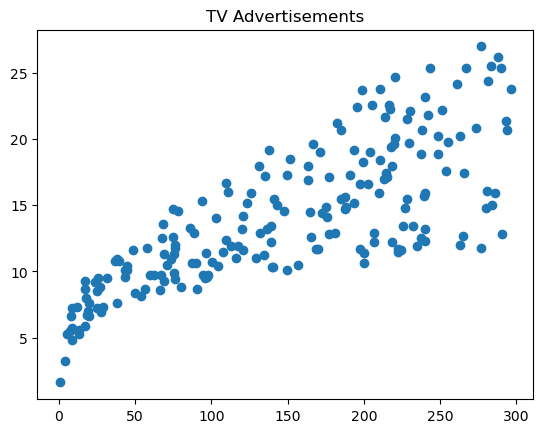

In [14]:
plt.scatter(df['TV'],Y)
plt.title('TV Advertisements')

Text(0.5, 1.0, 'Radio Advertisements')

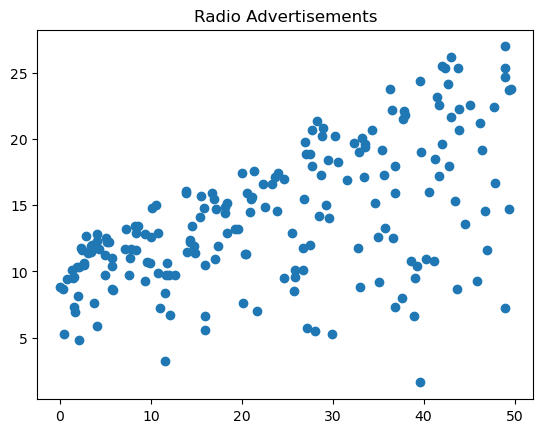

In [15]:
plt.scatter(df['Radio'],Y)
plt.title('Radio Advertisements')

Text(0.5, 1.0, 'Newspaper Advertisements')

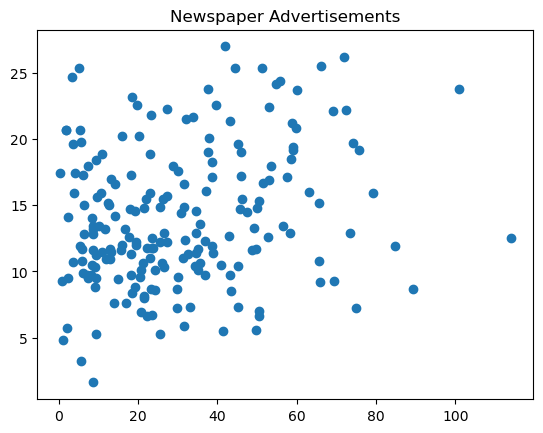

In [17]:
plt.scatter(df['Newspaper'],Y)
plt.title('Newspaper Advertisements')

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
cols = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X.columns = cols
X

,TV,Radio,Newspaper
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802
...,...,...,...
195,-1.270941,-1.321031,-0.771217
196,-0.617035,-1.240003,-1.033598
197,0.349810,-0.942899,-1.111852
198,1.594565,1.265121,1.640850


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 50, test_size = 0.25)

In [9]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, Y_train)


LinearRegression()

In [10]:
Y_pred = clf.predict(X_test)
Y_pred

array([13.80954103, 14.6637734 , 10.53594392,  9.94329962, 10.09102145,
       18.2826515 , 15.23069647,  3.47866075, 20.50438323, 11.82515208,
       14.86548863, 12.75766989, 21.10572152, 14.26282047, 15.77765346,
       16.92664868, 10.11145055, 16.65119387,  9.57080112, 12.41197562,
       16.87911139, 10.10036502,  8.01212084, 13.82886497, 21.13119665,
       14.26150559,  7.07888394,  7.47332175, 15.35058814, 13.45058622,
       14.92030561, 10.06422658, 11.8881704 , 16.34487067,  6.48117542,
        9.63271238, 13.02065077, 20.43280794,  9.06454018, 11.29775128,
        7.24854645, 24.43738014,  9.77744347, 18.22599771, 16.45502802,
       12.16207576, 12.26675531, 15.86193806,  8.70368066,  7.76559449])

In [11]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test,Y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.1201664625608077


In [12]:
import statsmodels.api as sm

X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 23 Jul 2023   Prob (F-statistic):           1.58e-96
Time:                        14:40:34   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0225      0.119    117.655      0.0